In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1.Read in the data from data/cars.csv and call it "df". This is a slightly smaller, cleaned dataset from this original dataset:

https://archive.ics.uci.edu/ml/datasets/automobile

In [4]:
df = pd.read_csv('data/cars.csv', index_col=0)
df.head()

,make,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,alfa-romero,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,audi,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,audi,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


2.Create a frequency chart for "make" in descending order of frequency. Hint: use value_counts.

In [5]:
df['make'].value_counts()

toyota           32
nissan           18
mitsubishi       13
honda            13
mazda            13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
chevrolet         3
alfa-romero       3
jaguar            3
isuzu             2
mercury           1
Name: make, dtype: int64

3.Drop the "make" column from the dataframe, replacing it with one-hot columns corresponding to each make. This updated dataframe should be called "new_df" and it should contain 35 columns.

In [6]:
one_hot = pd.get_dummies(df['make'])
new_df = df.drop(columns = ['make'])
new_df = new_df.join(one_hot)
print(new_df.shape)
new_df.head()

(195, 35)


,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,...,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,...,0,0,0,0,0,0,0,0,0,0


4.Let's do something wrong and see what happens. Let X correspond to all of the input data in new_df (including price) and let y correspond to the target variable (price). Run a linear regression on the entire dataset and print both R^2 and the adjusted R^2. Why do you get what you get?

In [7]:
X = new_df
y = df['price']

model = LinearRegression()
model.fit(X, y)
print(f"R^2: {model.score(X,y)}")
print(f"Adjusted R^2: {1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)}")

R^2: 1.0
Adjusted R^2: 1.0


5.In the cell below, correct your mistake above in order and run a linear regression again. Print both R^2 and the adjusted R^2.

In [8]:
X = new_df.drop(columns = ['price'])
y = df['price']

model = LinearRegression()
model.fit(X, y)
print(f"R^2: {model.score(X,y)}")
print(f"Adjusted R^2: {1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)}")

R^2: 0.9437780881065051
Adjusted R^2: 0.9318309318291375


6.Sort the correlations of each variable with respect to price in decending order to view which variables are most and least influential. Are there any surprises?

In [9]:
new_df.corr()['price'].sort_values(ascending=False)

price                1.000000
engine-size          0.888942
curb-weight          0.835729
horsepower           0.811027
width                0.754273
length               0.695331
wheel-base           0.585793
bore                 0.546873
mercedes-benz        0.525064
jaguar               0.332145
bmw                  0.331289
porsche              0.326910
volvo                0.146514
height               0.138291
audi                 0.102243
stroke               0.093746
compression-ratio    0.069500
peugot               0.068190
saab                 0.043799
alfa-romero          0.035005
mercury              0.029082
isuzu               -0.054873
volkswagen          -0.101036
peak-rpm            -0.104333
mazda               -0.110537
nissan              -0.112402
chevrolet           -0.112639
plymouth            -0.126900
mitsubishi          -0.133312
dodge               -0.147071
subaru              -0.149992
honda               -0.168403
toyota              -0.185389
city-mpg  

7.Read the "Filter Method" section of the article located here:
    
https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
    
Use it to create a list of columns called "relevant_features" that contains only the variables whose correlations with price had an absolute value greater than 0.1. 

In [10]:
cor = new_df.corr()
cor_target = abs(cor["price"])
relevant_features = cor_target[cor_target>0.1]
relevant_features

wheel-base       0.585793
length           0.695331
width            0.754273
height           0.138291
curb-weight      0.835729
engine-size      0.888942
bore             0.546873
horsepower       0.811027
peak-rpm         0.104333
city-mpg         0.702685
highway-mpg      0.715590
price            1.000000
audi             0.102243
bmw              0.331289
chevrolet        0.112639
dodge            0.147071
honda            0.168403
jaguar           0.332145
mazda            0.110537
mercedes-benz    0.525064
mitsubishi       0.133312
nissan           0.112402
plymouth         0.126900
porsche          0.326910
subaru           0.149992
toyota           0.185389
volkswagen       0.101036
volvo            0.146514
Name: price, dtype: float64

8.Run a linear regression again but now only with input corresponding to the relevant features. 

Hint: "X = new_df[relevant_features.index]" is a line that may be helpful.

How does your adjusted R^2 here compare to the adjusted R^2 obtained you obtained above by using all columns except for price as your input?

In [11]:
X = new_df[relevant_features.index]
X = X.drop(columns = ['price'])
y = df['price']

model = LinearRegression()
model.fit(X, y)
print(f"R^2: {model.score(X,y)}")
print(f"Adjusted R^2: {1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)}")

R^2: 0.941973699434683
Adjusted R^2: 0.932592201738494


9.For the sake of simplicity, reduce our dataset even further to contain only columns whose correlations with price are greater than 0.7 and print the head of the dataset:

In [12]:
cor = new_df.corr()
cor_target = abs(cor["price"])
relevant_features = cor_target[cor_target>0.7]
X = new_df[relevant_features.index]
X.head()

,width,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price
0,64.1,2548,130,111.0,21,27,13495.0
1,64.1,2548,130,111.0,21,27,16500.0
2,65.5,2823,152,154.0,19,26,16500.0
3,66.2,2337,109,102.0,24,30,13950.0
4,66.4,2824,136,115.0,18,22,17450.0


10.Run a linear regression model using this reduced input:

In [13]:
X = X.drop(columns = ['price'])
y = df['price']

model = LinearRegression()
model.fit(X, y)
print(f"R^2: {model.score(X,y)}")
print(f"Adjusted R^2: {1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)}")

R^2: 0.8280070807095943
Adjusted R^2: 0.82251794498756


11.Write the equation of the linear regression model. You can do this in markdown or using hashtags.

In [14]:
print(model.intercept_, model.coef_)
#price = -54600.134765097755 + 626.26930849*width + 2.40772293*curb-weight + ...+180.7692751*highway_mpg

-54600.134765097755 [626.26930849   2.40772293  94.93655879  50.4563703  -98.82243303
 180.7692751 ]


12.The stats on a school bus are width = 102 inches, curb-weight = 30000 pounds, engine-size = 550, horsepower = 250, city-mpg = 4, highway-mpg = 6. Use model.predict to predict the price of the school bus. Why might you have reservations in using this model to do this?

In [15]:
model.predict([[102, 30000, 550, 250, 4, 6 ]])
#extrapolating too far away

array([147029.54851134])

13.Do a sns pair-wise plot of the 6 predictor variables and price.

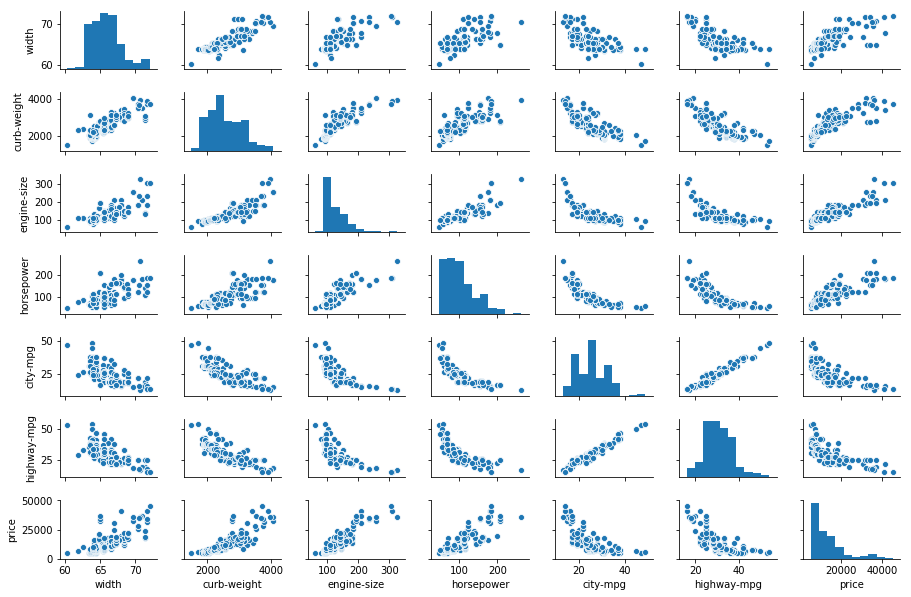

In [16]:
X = new_df[relevant_features.index]
sns.pairplot(X, height = 1.2, aspect=1.5)

14.We have been sweeping something under the rug...the histograms should appear somewhat normally distributed if we want to use linear regression. The price, engine-size, and horse-power histograms look especially skewed. Create a new dataframe that contains **seven** variables: the original width, curb-weight, city-mpg, and highway-mpg, and the logs of the price, engine-size, and horsepower columns.

Hint: X['log_price'] = np.log(X['price']) is a quick way to make a new column.

In [17]:
X = new_df[relevant_features.index]
X.loc[:,'log_price'] = np.log(X['price']).to_numpy()
X.loc[:,'log_engine-size'] = np.log(X['engine-size']).to_numpy()
X.loc[:,'log_horsepower'] = np.log(X['horsepower']).to_numpy()
X = X.drop(columns=['price', 'engine-size', 'horsepower'])
X.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,width,curb-weight,city-mpg,highway-mpg,log_price,log_engine-size,log_horsepower
0,64.1,2548,21,27,9.510075,4.867534,4.709530
1,64.1,2548,21,27,9.711116,4.867534,4.709530
2,65.5,2823,19,26,9.711116,5.023881,5.036953
3,66.2,2337,24,30,9.543235,4.691348,4.624973
4,66.4,2824,18,22,9.767095,4.912655,4.744932


15.Create a new sns-pairplot of this data to verify that the histograms look a bit more normally distributed:

In [ ]:
sns.pairplot(X, height = 1.2, aspect=1.5)

16.Run a linear regression on this transformed dataset, using log_price as your target variable, Did your R^2 improve by transforming the data?

In [18]:
y = X['log_price']
X = X.drop(columns = ['log_price'])


model = LinearRegression()
model.fit(X, y)
print(f"R^2: {model.score(X,y)}")
print(f"Adjusted R^2: {1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)}")

R^2: 0.868053370869926
Adjusted R^2: 0.863842308238115
